# section 2: PCA

Student name: Xiaoyan Huang <br>
Student Id: 22670287

In this section, based on the result of Exploratory Data Analysis (EDA) such as the correlation of each elements, we select some suitable features to build model. The main strategy in the section is principal component analysis (PCA) reducing the dimension of dataset and visualizing data. Furthermore, the clustering model (K-means) is based on the components created by PCA, which makes a great impact on the outcome. However, there are three different types of PCA would be explored, linear, polynomial and MiniBatchSparsePCA. Hence, we will compare the performance of each type of PCA. Besides, we also consider different way of reduction such as Isomap, TSNE etc. After comparision, we reckon the method of ... is better. In the third step, we analyze the clustering results with special elements and visualize the results by boxplot. Finally, using three heatmaps separately show different groups clustered by the model.

**Content <br>
step1: Feature selection <br>
step2: Feature reduction with PCA <br>
&emsp;&emsp;step2.1: Choose the number of components <br>
&emsp;&emsp;step2.2: Choose the number of cluster <br>
&emsp;&emsp;step2.3: Compare performance in different type of PCA <br>
step3: Analyze models <br>
&emsp;&emsp;step3.1: Analyse linear PCA model <br>
&emsp;&emsp;step3.2: Analyse poly PCA model <br>
step4: Visualization with heatmap <br>**

## step1: Feature selection

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import plotly.express as px
import os

In [11]:
cur_path = os.getcwd()
print("Checking my current path ", cur_path)

Checking my current path D:\JupyterNotebook\Notebook\Capstone\PCA


In [10]:
path = input("Entering the path you want ")
os.chdir(path)

Entering the path you want: D:\JupyterNotebook\Notebook\Capstone\PCA


In [19]:
filename = input("Entering your filename ")
path_of_ds = os.path.join(path, filename) # Kg.csv
dataset = pd.read_csv(path_of_ds,encoding= 'unicode_escape')

Entering your filename Kg.csv


In [20]:
dataset.shape

(1351, 95)

In [21]:
dataset.columns

Index(['SampleID', 'Rocktype', 'Source', 'Publication 1', 'Publication 2',
       'Project', 'Dlat', 'Dlong', 'Sample type', 'Core', 'Depth (m) from',
       'Depth (m) to', 'Description/Other notes', 'Unnamed: 13', 'SiO2_pct',
       'TiO2_pct', 'Al2O3_pct', 'Fe2O3T_pct', 'MgO_pct', 'MnO_pct', 'CaO_pct',
       'Na2O_pct', 'K2O_pct', 'P2O5_pct', 'SO3_pct', 'LOI_pct', 'Cl_pct',
       'Total_calc', 'Total (+LOI)', 'Total (+LOI+SO3)', 'aSiO2_pct',
       'aTiO2_pct', 'aAl2O3_pct', 'aFe2O3T_pct', 'aMgO_pct', 'aMnO_pct',
       'aCaO_pct', 'aNa2O_pct', 'aK2O_pct', 'aP2O5_pct', 'aTotal', 'FeOT_pct',
       'Mg#', 'Na20+K2O', 'K2O/Na2O', 'ASI', 'Eu/Eu*', 'Au_ppb', 'Pt_ppb',
       'Pd_ppb', 'Re_ppm', 'Ag_ppm', 'F_ppm', 'Bi_ppm', 'Sn_ppm', 'Mo_ppm',
       'Be_ppm', 'Cs_ppm', 'Ba_ppm', 'Rb_ppm', 'Sr_ppm', 'Pb_ppm', 'Th_ppm',
       'U_ppm', 'Nb_ppm', 'Ta_ppm', 'Zr_ppm', 'Hf_ppm', 'Y_ppm', 'Ga_ppm',
       'La_ppm', 'Ce_ppm', 'Pr_ppm', 'Nd_ppm', 'Sm_ppm', 'Eu_ppm', 'Gd_ppm',
       'Tb_ppm', 

**note: maually select the features based on high correlation results from EDA**

In [24]:
col = ['aSiO2_pct', 'aTiO2_pct', 'aAl2O3_pct', 'aFe2O3T_pct', 'aMgO_pct', 'aMnO_pct', 'aP2O5_pct', 'Th_ppm', 'Nb_ppm', 'Ta_ppm', 'Zr_ppm', 'Hf_ppm', 'Y_ppm', 'La_ppm', 'Sm_ppm', 'Eu_ppm', 'Gd_ppm', 'Yb_ppm', 'Ni_ppm', 'Cr_ppm', 'Depth (m) from']
# col = ['Th_ppm', 'Nb_ppm', 'Ta_ppm', 'Zr_ppm', 'Hf_ppm', 'Y_ppm', 'La_ppm', 'Sm_ppm', 'Eu_ppm', 'Gd_ppm', 'Yb_ppm', 'Ni_ppm', 'Cr_ppm']

In [25]:
X = dataset[dataset.columns & col]

In [26]:
len(X.columns), X.columns

(21,
 Index(['Depth (m) from', 'aSiO2_pct', 'aTiO2_pct', 'aAl2O3_pct', 'aFe2O3T_pct',
        'aMgO_pct', 'aMnO_pct', 'aP2O5_pct', 'Th_ppm', 'Nb_ppm', 'Ta_ppm',
        'Zr_ppm', 'Hf_ppm', 'Y_ppm', 'La_ppm', 'Sm_ppm', 'Eu_ppm', 'Gd_ppm',
        'Yb_ppm', 'Ni_ppm', 'Cr_ppm'],
       dtype='object'))

In [9]:
X.shape

(1351, 21)

In [27]:
X.isnull().sum()

Depth (m) from    315
aSiO2_pct           0
aTiO2_pct           0
aAl2O3_pct          0
aFe2O3T_pct         0
aMgO_pct            0
aMnO_pct            0
aP2O5_pct           0
Th_ppm             16
Nb_ppm             12
Ta_ppm             86
Zr_ppm              1
Hf_ppm             13
Y_ppm               1
La_ppm              0
Sm_ppm              0
Eu_ppm              0
Gd_ppm              1
Yb_ppm              0
Ni_ppm             18
Cr_ppm             30
dtype: int64

**note: there are some null value due to detective limitation, these null values are replaced with 0. However, the missing value of depth does not due to limitation, those null values are replaced by mean depth.**

In [28]:
mean_depth = X['Depth (m) from'].mean()
mean_depth

471.7682335907336

In [30]:
X.loc[:,('Depth (m) from')] = X['Depth (m) from'].fillna(mean_depth)

In [31]:
XX = X.fillna(0)
XX

Depth (m) from  aSiO2_pct  aTiO2_pct  aAl2O3_pct  aFe2O3T_pct  aMgO_pct  \
0         471.768234      50.76       0.87       14.71        12.89      7.75   
1         471.768234      48.56       0.85       15.26        11.63      7.58   
2         471.768234      50.90       1.24       14.47        14.38      6.88   
3         471.768234      51.77       0.88       14.80        12.65      7.52   
4         471.768234      53.94       0.53       10.72        10.87     14.06   
...              ...        ...        ...         ...          ...       ...   
1346      471.768234      53.56       0.50       12.32        11.44      8.29   
1347      471.768234      55.44       0.73       16.26         6.87      6.96   
1348      471.768234      54.55       0.69       17.16         6.04      6.55   
1349      471.768234      55.79       0.77       15.07         8.57      6.11   
1350      471.768234      53.79       0.64       13.19        10.51      7.96   

      aMnO_pct  aP2O5_pct  Th_ppm  Nb_ppm  ...  Zr_ppm  Hf_ppm  Y_ppm  La_ppm  \
0         0.17       0.07    0.30     2.3  ...    50.0     1.6   22.8     2.8   
1         0.22       0.02    0.00     0.1  ...    11.0     0.6   12.3     0.5   
2         0.21       0.10    0.30     3.2  ...    73.0     2.3   25.9     3.4   
3         0.21       0.07    0.60     1.7  ...    37.9     1.2   15.4     2.8   
4         0.19       0.05    2.10     2.3  ...    49.6     1.2   14.4     5.5   
...        ...        ...     ...     ...  ...     ...     ...    ...     ...   
1346      0.24       0.04    0.26     0.9  ...    33.0     0.9   13.1     1.9   
1347      0.14       0.08    0.78     2.4  ...    62.0     1.7   20.3     4.3   
1348      0.15       0.07    0.73     2.4  ...    58.0     1.6   16.3     4.5   
1349      0.16       0.08    4.19     3.7  ...    85.0     2.3   19.0    12.6   
1350      0.20       0.06    3.29     3.0  ...    67.0     1.9   17.0    10.1   

      Sm_ppm  Eu_ppm  Gd_ppm  Yb_ppm  Ni_ppm  Cr_ppm  
0       2.12   0.799    2.91    2.22   112.0   345.0  
1       1.25   0.701    2.05    1.54   173.0   394.0  
2       2.99   1.010    4.05    3.03    98.0   190.0  
3       1.86   0.767    2.01    1.57    73.0   306.0  
4       1.47   0.491    1.64    1.24   199.0  1282.0  
...      ...     ...     ...     ...     ...     ...  
1346    1.04   0.420    1.66    1.22  1105.0  3160.0  
1347    2.10   0.700    2.74    2.00   143.0   550.0  
1348    1.85   0.690    2.34    1.62    99.0   390.0  
1349    2.69   0.820    2.99    1.88    61.0   190.0  
1350    2.33   0.650    2.55    1.63   120.0   560.0  

[1351 rows x 21 columns]

In [32]:
XX.shape

(1351, 21)

## step2: Feature reduction with PCA

### step2.1: Choose the number of components

In [33]:
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, MiniBatchSparsePCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, TSNE, SpectralEmbedding
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
import plotly.express as px
import plotly

In [34]:
pca = PCA()
nor_X = preprocessing.normalize(XX)
pca.fit(nor_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**note: the variance ratio can repersent the ability of component to cluster. In here, these are the variance ratio for each component and are exhibited by the bar chart and line chart.**

In [35]:
pca.explained_variance_ratio_

array([7.79121345e-01, 1.24540376e-01, 4.67973383e-02, 3.52800822e-02,
       9.22359753e-03, 4.32134039e-03, 4.21856404e-04, 1.51926487e-04,
       7.11251882e-05, 3.93517025e-05, 1.20198780e-05, 7.92620966e-06,
       6.31616847e-06, 2.01338567e-06, 1.12226076e-06, 9.45901283e-07,
       5.63244064e-07, 4.44796630e-07, 2.51038911e-07, 4.67178615e-08,
       1.08526876e-08])

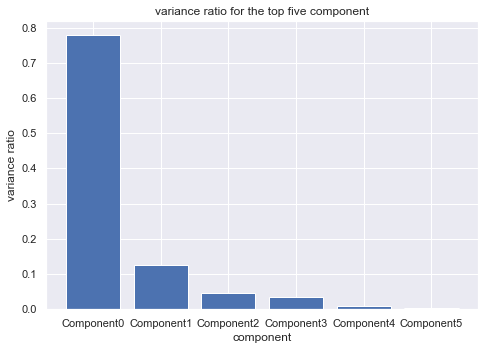

In [36]:
c = []
for i in range(0, 6):
    string = "Component%i" % i
    c.append(string)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(c, pca.explained_variance_ratio_[0:6])
ax.set_title('variance ratio for the top five component')
ax.set_xlabel('component')
ax.set_ylabel('variance ratio')
plt.show()

**note: this is the curve using cumulative explained variance and we can know there is no more significant change after 3 components. From that result, we can decide to choose the three top components as cluster model features according to elbow principle.**

Text(0, 0.5, 'Cumulative Explained Variance')

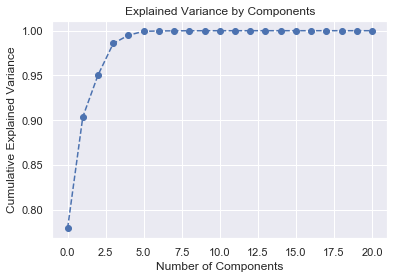

In [37]:
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

### step2.2: Choose the number of cluster

In [ ]:
#pca = SparsePCA(n_components=3, random_state=0)
#pca = MiniBatchSparsePCA(n_components=2, batch_size=100, random_state=0)
#pca = Isomap(n_neighbors=30, n_components=2)
#pca = LocallyLinearEmbedding(n_neighbors=30, n_components=2, #method='standard')
#pca = TruncatedSVD(n_components=2)
#pca = MDS(n_components=2, n_init=1, max_iter=100)

**note: at the beginning, we are not sure how many population group in the geochemical dataset. Thus, we use within-cluster-sum-of-squares(WCSS) to judge the number of possible group. From the line chart, there are three population groups according to elbow principle.**

In [38]:
pca_linear = PCA()

In [39]:
scores_linear = pca_linear.fit_transform(nor_X)

In [40]:
WCSS=[]
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, random_state=42)
    kmeans_pca.fit(scores_linear)
    WCSS.append(kmeans_pca.inertia_)

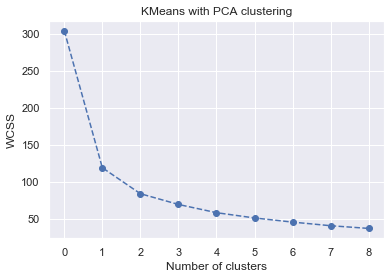

In [41]:
plt.plot(WCSS, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('KMeans with PCA clustering')
plt.show()

### step2.3: Compare performance in different type of PCA

**Attemp1: linear PCA**

**note: using linear pca seem not good, because the group0 and group1 seem to be separated compulsorily**

In [42]:
pca_linear = KernelPCA(n_components=2, kernel='linear')
scores_linear = pca_linear.fit_transform(nor_X)

In [43]:
kmeans_pca_linear = KMeans(n_clusters=3,random_state=42) # 3 cluster groups
kmeans_pca_linear.fit(scores_linear)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [44]:
np.unique(kmeans_pca_linear.labels_)

array([0, 1, 2])

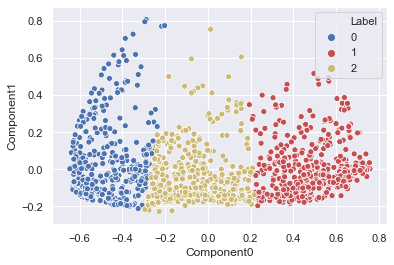

In [45]:
df_kmeans_pca_linear = pd.concat([XX.reset_index(drop=True), pd.DataFrame(scores_linear)], axis=1)
df_kmeans_pca_linear.columns.values[-2:] = ['Component0','Component1']
df_kmeans_pca_linear['Label'] = kmeans_pca_linear.labels_
x_axis = df_kmeans_pca_linear['Component0']
y_axis = df_kmeans_pca_linear['Component1']
sns.scatterplot(x_axis, y_axis, hue=df_kmeans_pca_linear['Label'], palette = ['b','r','y'])

In [46]:
df_kmeans_pca_linear['Dlat'] = dataset['Dlat']
df_kmeans_pca_linear['Dlong'] = dataset['Dlong']
df_kmeans_pca_linear['Depth_From'] = dataset['Depth (m) from']
df = df_kmeans_pca_linear
fig = px.scatter_3d(df, x='Dlat', y='Dlong', z='Depth_From', color='Label')

In [47]:
print("Saving 3d html in the current path")
filename = os.path.join(path, "3d_fig_1.html")
plotly.offline.plot(fig, filename=filename)

Saving 3d html in the current path


'D:\\JupyterNotebook\\Notebook\\Capstone\\PCA\\3d_fig_1.html'

**Attemp2: polynomial PCA**

**note: using polynomial pca also is not good, the model is overfit.**

In [48]:
pca_poly = KernelPCA(n_components=2, kernel='rbf', gamma=15)
scores_poly = pca_poly.fit_transform(nor_X)

In [49]:
kmeans_pca_poly = KMeans(n_clusters=3, random_state=42) # 3 cluster groups
kmeans_pca_poly.fit(scores_poly)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

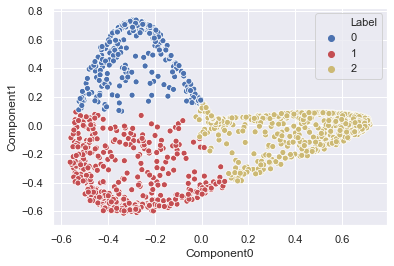

In [50]:
df_kmeans_pca_poly = pd.concat([XX.reset_index(drop=True), pd.DataFrame(scores_poly)], axis=1)
df_kmeans_pca_poly.columns.values[-2:] = ['Component0','Component1']
df_kmeans_pca_poly['Label'] = kmeans_pca_poly.labels_
x_axis = df_kmeans_pca_poly['Component0']
y_axis = df_kmeans_pca_poly['Component1']
sns.scatterplot(x_axis, y_axis, hue=df_kmeans_pca_poly['Label'], palette = ['b','r','y'])

In [51]:
df_kmeans_pca_poly['Dlat'] = dataset['Dlat']
df_kmeans_pca_poly['Dlong'] = dataset['Dlong']
df_kmeans_pca_poly['Depth_From'] = dataset['Depth (m) from']
df = df_kmeans_pca_poly
fig = px.scatter_3d(df, x='Dlat', y='Dlong', z='Depth_From', color='Label')

In [52]:
print("Saving 3d html in the current path")
filename = os.path.join(path, "3d_fig_2.html")
plotly.offline.plot(fig, filename=filename)

Saving 3d html in the current path


'D:\\JupyterNotebook\\Notebook\\Capstone\\PCA\\3d_fig_2.html'

**Attemp3: Sparse PCA**

In [53]:
pca_sparse = MiniBatchSparsePCA(n_components=2, batch_size=50, alpha=10, random_state=0)
scores_sparse = pca_sparse.fit_transform(nor_X)

In [54]:
kmeans_pca_sparse = KMeans(n_clusters=3, random_state=42) # 3 cluster groups
kmeans_pca_sparse.fit(scores_sparse)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

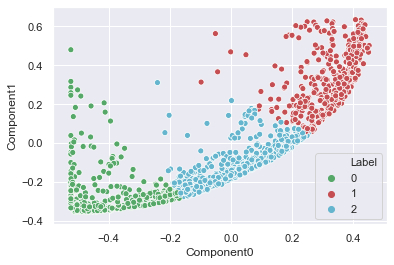

In [55]:
df_kmeans_pca_sparse = pd.concat([XX.reset_index(drop=True), pd.DataFrame(scores_sparse)], axis=1)
df_kmeans_pca_sparse.columns.values[-2:] = ['Component0','Component1']
df_kmeans_pca_sparse['Label'] = kmeans_pca_sparse.labels_
x_axis = df_kmeans_pca_sparse['Component0']
y_axis = df_kmeans_pca_sparse['Component1']
sns.scatterplot(x_axis, y_axis, hue=df_kmeans_pca_sparse['Label'], palette = ['g','r','c'])

In [56]:
df_kmeans_pca_sparse['Dlat'] = dataset['Dlat']
df_kmeans_pca_sparse['Dlong'] = dataset['Dlong']
df_kmeans_pca_sparse['Depth_From'] = dataset['Depth (m) from']

df = df_kmeans_pca_sparse
fig = px.scatter_3d(df, x='Dlat', y='Dlong', z='Depth_From', color='Label')

In [57]:
print("Saving 3d html in the current path")
filename = os.path.join(path, "3d_fig_3.html")
plotly.offline.plot(fig, filename=filename)

Saving 3d html in the current path


'D:\\JupyterNotebook\\Notebook\\Capstone\\PCA\\3d_fig_3.html'

**Attemp4: Isomap**

In [58]:
pca_Isomap = Isomap(n_neighbors=100, n_components=2)
scores_Isomap = pca_Isomap.fit_transform(nor_X)

In [59]:
kmeans_pca_Isomap = KMeans(n_clusters=3, random_state=42) # 3 cluster groups
kmeans_pca_Isomap.fit(scores_Isomap)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

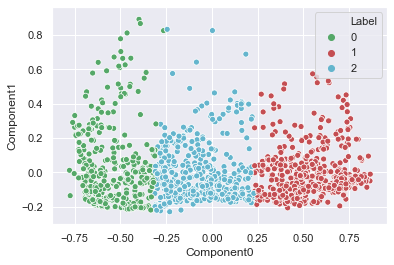

In [60]:
df_kmeans_pca_Isomap = pd.concat([XX.reset_index(drop=True), pd.DataFrame(scores_Isomap)], axis=1)
df_kmeans_pca_Isomap.columns.values[-2:] = ['Component0','Component1']
df_kmeans_pca_Isomap['Label'] = kmeans_pca_Isomap.labels_
x_axis = df_kmeans_pca_Isomap['Component0']
y_axis = df_kmeans_pca_Isomap['Component1']
sns.scatterplot(x_axis, y_axis, hue=df_kmeans_pca_Isomap['Label'], palette = ['g','r','c'])

In [44]:
df_kmeans_pca_Isomap['Dlat'] = dataset['Dlat']
df_kmeans_pca_Isomap['Dlong'] = dataset['Dlong']
df_kmeans_pca_Isomap['Depth_From'] = dataset['Depth (m) from']

df = df_kmeans_pca_Isomap
fig = px.scatter_3d(df, x='Dlat', y='Dlong', z='Depth_From', color='Label')

In [61]:
print("Saving 3d html in the current path")
filename = os.path.join(path, "3d_fig_4.html")
plotly.offline.plot(fig, filename=filename)

Saving 3d html in the current path


'D:\\JupyterNotebook\\Notebook\\Capstone\\PCA\\3d_fig_4.html'

**Attemp5: TSNE**

**note: the methods of sparse PCA and lsomap are also not ideal, but tsne looks more available than others.**

In [62]:
pca_tsne = TSNE(n_components=2, init='pca', random_state=0, learning_rate=5, perplexity=50)
scores_tsne = pca_tsne.fit_transform(nor_X)

In [63]:
kmeans_pca_tsne = KMeans(n_clusters=3, random_state=42) # 3 cluster groups
kmeans_pca_tsne.fit(scores_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

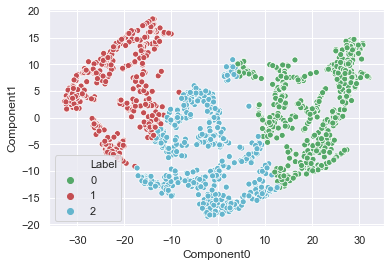

In [64]:
df_kmeans_pca_tsne = pd.concat([XX.reset_index(drop=True), pd.DataFrame(scores_tsne)], axis=1)
df_kmeans_pca_tsne.columns.values[-2:] = ['Component0','Component1']
df_kmeans_pca_tsne['Label'] = kmeans_pca_tsne.labels_
x_axis = df_kmeans_pca_tsne['Component0']
y_axis = df_kmeans_pca_tsne['Component1']
sns.scatterplot(x_axis, y_axis, hue=df_kmeans_pca_tsne['Label'], palette = ['g','r','c'])

In [65]:
df_kmeans_pca_tsne['Dlat'] = dataset['Dlat']
df_kmeans_pca_tsne['Dlong'] = dataset['Dlong']
df_kmeans_pca_tsne['Depth_From'] = dataset['Depth (m) from']

df = df_kmeans_pca_tsne
fig = px.scatter_3d(df, x='Dlat', y='Dlong', z='Depth_From', color='Label')

In [66]:
print("Saving 3d html in the current path")
filename = os.path.join(path, "3d_fig_5.html")
plotly.offline.plot(fig, filename=filename)

Saving 3d html in the current path


'D:\\JupyterNotebook\\Notebook\\Capstone\\PCA\\3d_fig_5.html'

## step3: Analyze models

**step3.1 Analyse linear PCA model**

In [ ]:
# df_kmeans_pca_poly['aTiO2_pct'] = dataset['aTiO2_pct']

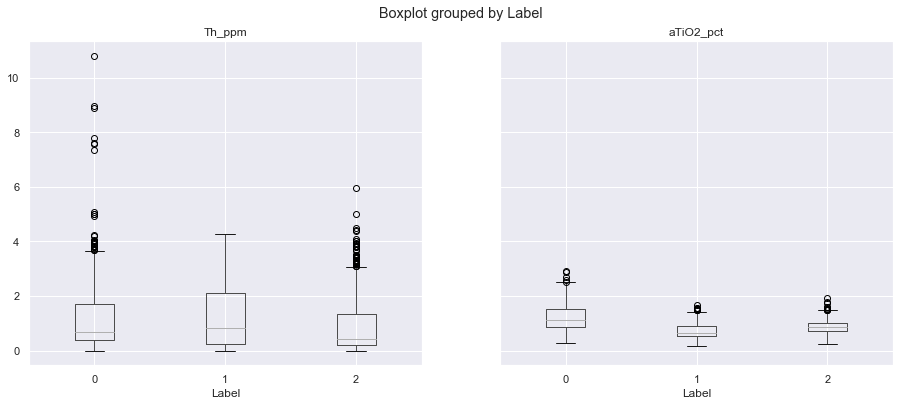

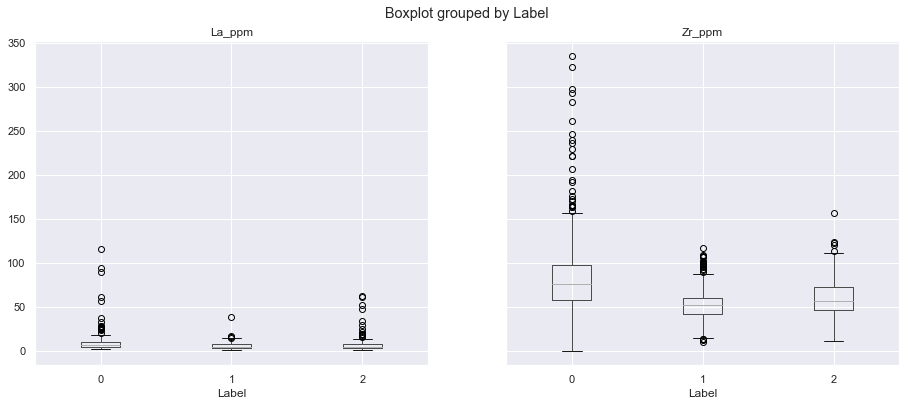

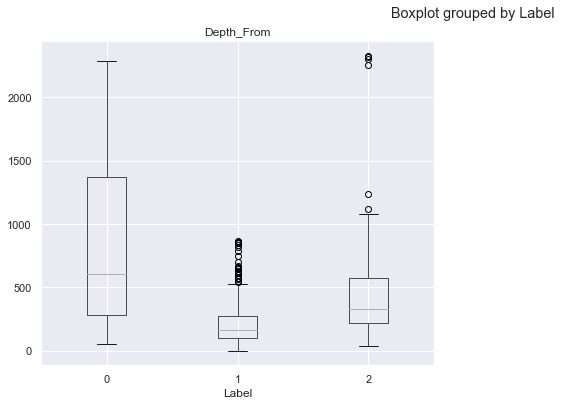

In [67]:
boxplot = df_kmeans_pca_linear.boxplot(column=['Th_ppm','aTiO2_pct'], by='Label', layout=(1,2), figsize=(15, 6))
boxplot = df_kmeans_pca_linear.boxplot(column=['La_ppm','Zr_ppm'], by='Label', layout=(1,2), figsize=(15, 6))
boxplot = df_kmeans_pca_linear.boxplot(column=['Depth_From'], by='Label', layout=(1,2), figsize=(15, 6))

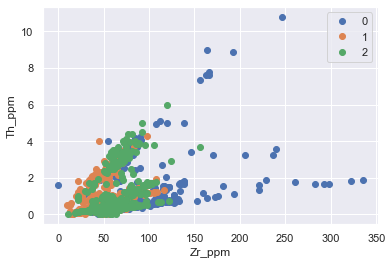

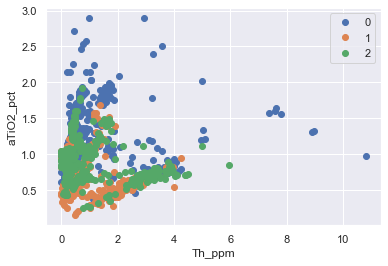

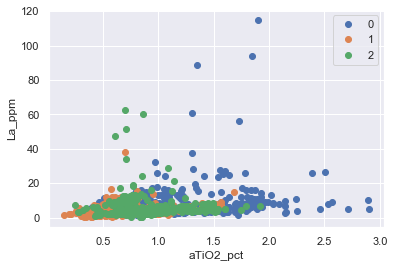

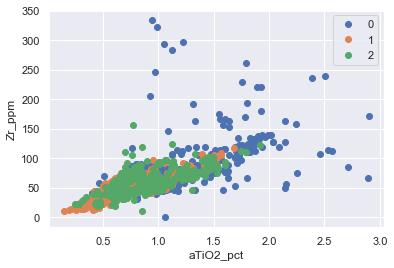

In [68]:
groups = df_kmeans_pca_linear.groupby("Label")

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Zr_ppm'], group['Th_ppm'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("Zr_ppm")
plt.ylabel("Th_ppm")
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Th_ppm'], group['aTiO2_pct'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("Th_ppm")
plt.ylabel("aTiO2_pct")
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['aTiO2_pct'], group['La_ppm'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("aTiO2_pct")
plt.ylabel("La_ppm")
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['aTiO2_pct'], group['Zr_ppm'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("aTiO2_pct")
plt.ylabel("Zr_ppm")
plt.show()

**step3.2 analyse poly PCA model**

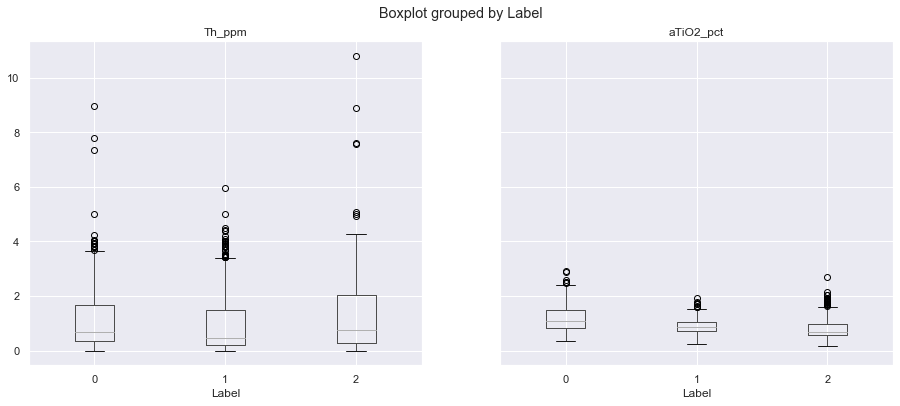

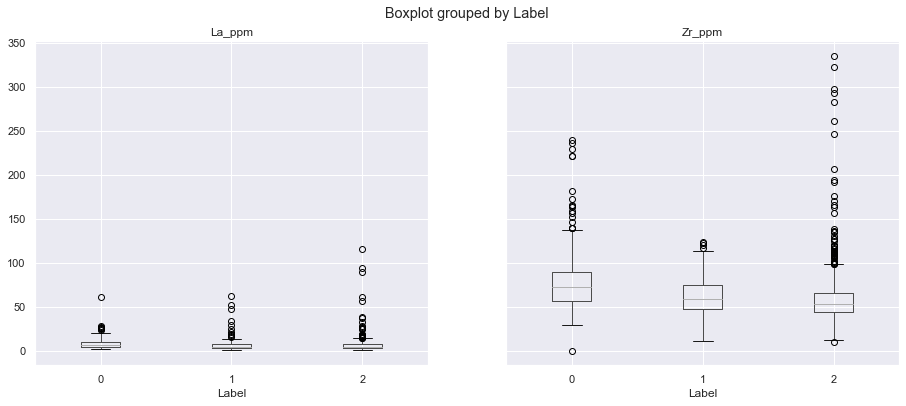

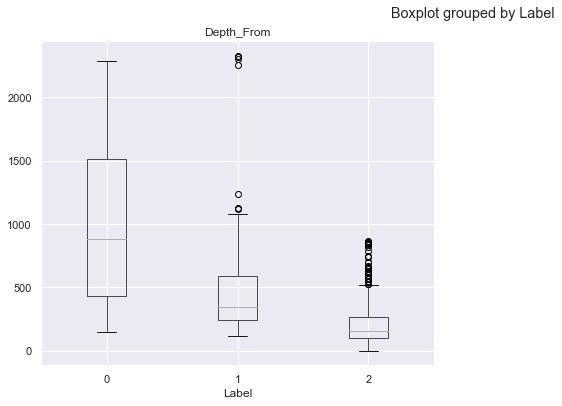

In [69]:
boxplot = df_kmeans_pca_poly.boxplot(column=['Th_ppm','aTiO2_pct'], by='Label', layout=(1,2), figsize=(15, 6))
boxplot = df_kmeans_pca_poly.boxplot(column=['La_ppm','Zr_ppm'], by='Label', layout=(1,2), figsize=(15, 6))
boxplot = df_kmeans_pca_poly.boxplot(column=['Depth_From'], by='Label', layout=(1,2), figsize=(15, 6))

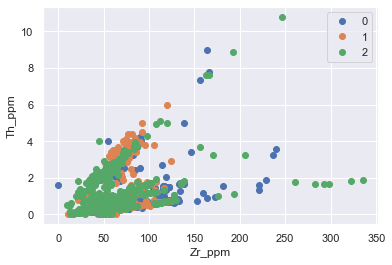

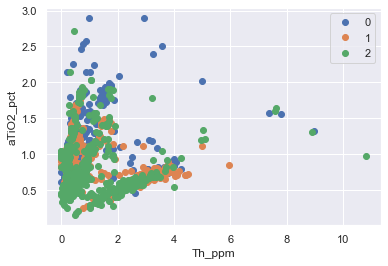

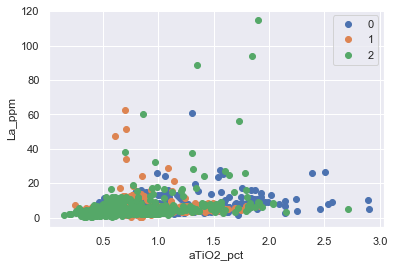

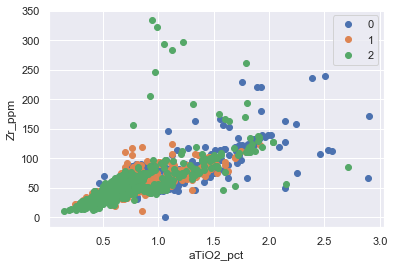

In [70]:
groups = df_kmeans_pca_poly.groupby("Label")

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Zr_ppm'], group['Th_ppm'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("Zr_ppm")
plt.ylabel("Th_ppm")
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Th_ppm'], group['aTiO2_pct'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("Th_ppm")
plt.ylabel("aTiO2_pct")
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['aTiO2_pct'], group['La_ppm'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("aTiO2_pct")
plt.ylabel("La_ppm")
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['aTiO2_pct'], group['Zr_ppm'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("aTiO2_pct")
plt.ylabel("Zr_ppm")
plt.show()

**step3.2 analyse poly PCA model**

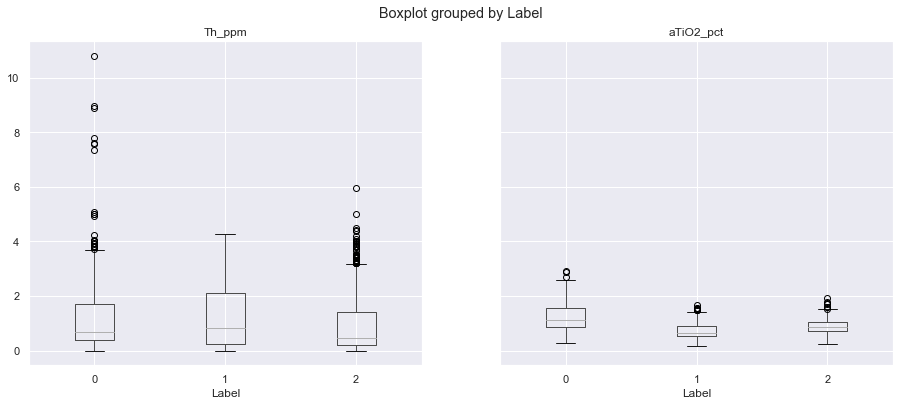

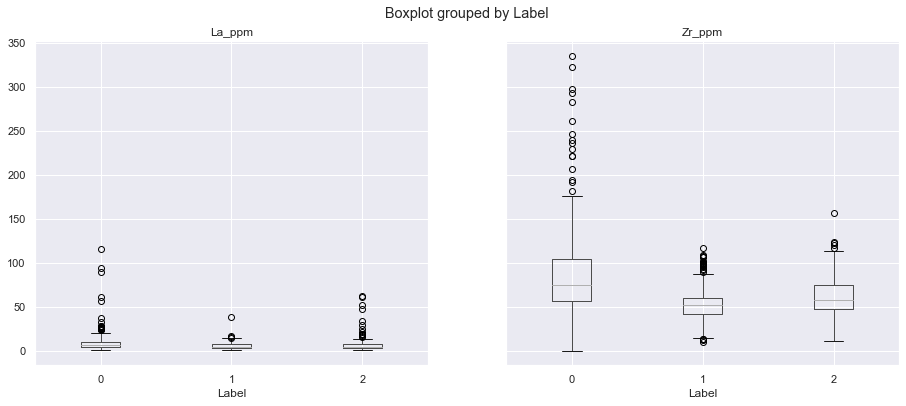

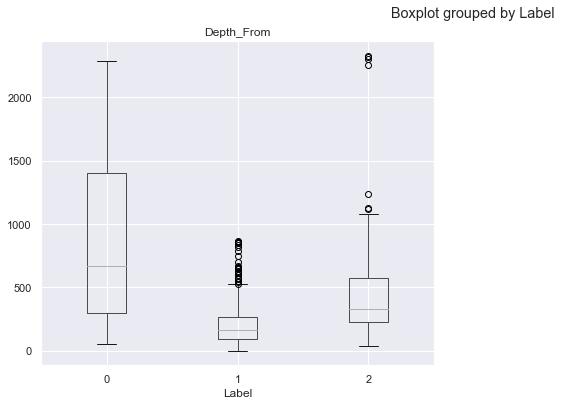

In [71]:
boxplot = df_kmeans_pca_sparse.boxplot(column=['Th_ppm','aTiO2_pct'], by='Label', layout=(1,2), figsize=(15, 6))
boxplot = df_kmeans_pca_sparse.boxplot(column=['La_ppm','Zr_ppm'], by='Label', layout=(1,2), figsize=(15, 6))
boxplot = df_kmeans_pca_sparse.boxplot(column=['Depth_From'], by='Label', layout=(1,2), figsize=(15, 6))

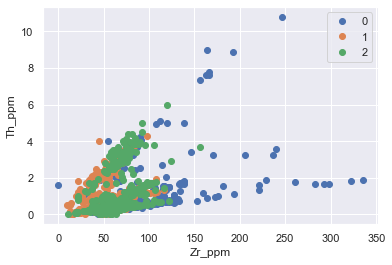

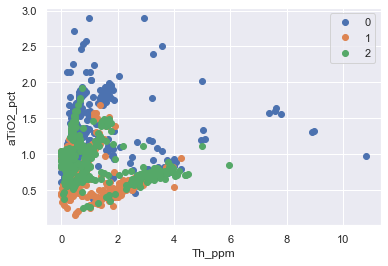

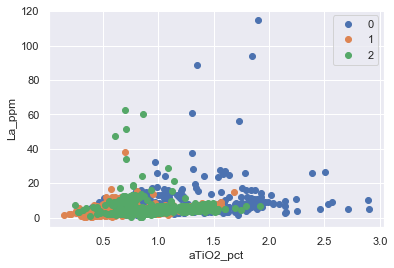

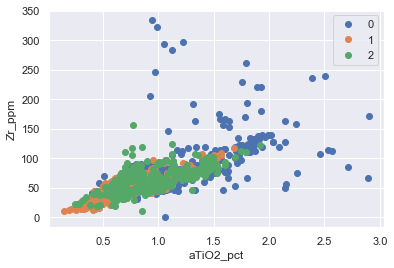

In [72]:
groups = df_kmeans_pca_sparse.groupby("Label")

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Zr_ppm'], group['Th_ppm'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("Zr_ppm")
plt.ylabel("Th_ppm")
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Th_ppm'], group['aTiO2_pct'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("Th_ppm")
plt.ylabel("aTiO2_pct")
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['aTiO2_pct'], group['La_ppm'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("aTiO2_pct")
plt.ylabel("La_ppm")
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['aTiO2_pct'], group['Zr_ppm'], marker="o", label=name, linestyle="")
ax.legend()
plt.xlabel("aTiO2_pct")
plt.ylabel("Zr_ppm")
plt.show()

## step4: Visualization with heatmap

In [73]:
df_kmeans_pca_poly.head()

Depth (m) from  aSiO2_pct  aTiO2_pct  aAl2O3_pct  aFe2O3T_pct  aMgO_pct  \
0      471.768234      50.76       0.87       14.71        12.89      7.75   
1      471.768234      48.56       0.85       15.26        11.63      7.58   
2      471.768234      50.90       1.24       14.47        14.38      6.88   
3      471.768234      51.77       0.88       14.80        12.65      7.52   
4      471.768234      53.94       0.53       10.72        10.87     14.06   

   aMnO_pct  aP2O5_pct  Th_ppm  Nb_ppm  ...  Gd_ppm  Yb_ppm  Ni_ppm  Cr_ppm  \
0      0.17       0.07     0.3     2.3  ...    2.91    2.22   112.0   345.0   
1      0.22       0.02     0.0     0.1  ...    2.05    1.54   173.0   394.0   
2      0.21       0.10     0.3     3.2  ...    4.05    3.03    98.0   190.0   
3      0.21       0.07     0.6     1.7  ...    2.01    1.57    73.0   306.0   
4      0.19       0.05     2.1     2.3  ...    1.64    1.24   199.0  1282.0   

   Component0  Component1  Label       Dlat       Dlong  Depth_From  
0   -0.387648   -0.599268      1 -30.853627  121.886341         NaN  
1   -0.198635   -0.525063      1 -30.900367  121.857666         NaN  
2   -0.546164   -0.028518      1 -30.851064  121.891517         NaN  
3   -0.439415   -0.476268      1 -31.072675  121.919600         NaN  
4    0.576046   -0.001381      2 -31.084287  121.943558         NaN  

[5 rows x 27 columns]

In [74]:
df_kmeans_pca_poly['Dlat'] = dataset[['Dlat']]
df_kmeans_pca_poly['Dlong'] = dataset[['Dlong']]

In [75]:
df_kmeans_pca_poly.head()

Depth (m) from  aSiO2_pct  aTiO2_pct  aAl2O3_pct  aFe2O3T_pct  aMgO_pct  \
0      471.768234      50.76       0.87       14.71        12.89      7.75   
1      471.768234      48.56       0.85       15.26        11.63      7.58   
2      471.768234      50.90       1.24       14.47        14.38      6.88   
3      471.768234      51.77       0.88       14.80        12.65      7.52   
4      471.768234      53.94       0.53       10.72        10.87     14.06   

   aMnO_pct  aP2O5_pct  Th_ppm  Nb_ppm  ...  Gd_ppm  Yb_ppm  Ni_ppm  Cr_ppm  \
0      0.17       0.07     0.3     2.3  ...    2.91    2.22   112.0   345.0   
1      0.22       0.02     0.0     0.1  ...    2.05    1.54   173.0   394.0   
2      0.21       0.10     0.3     3.2  ...    4.05    3.03    98.0   190.0   
3      0.21       0.07     0.6     1.7  ...    2.01    1.57    73.0   306.0   
4      0.19       0.05     2.1     2.3  ...    1.64    1.24   199.0  1282.0   

   Component0  Component1  Label       Dlat       Dlong  Depth_From  
0   -0.387648   -0.599268      1 -30.853627  121.886341         NaN  
1   -0.198635   -0.525063      1 -30.900367  121.857666         NaN  
2   -0.546164   -0.028518      1 -30.851064  121.891517         NaN  
3   -0.439415   -0.476268      1 -31.072675  121.919600         NaN  
4    0.576046   -0.001381      2 -31.084287  121.943558         NaN  

[5 rows x 27 columns]

**note: we calculate the density instance according to latitude and longitude for each group. Besides, the final results have been stored as a javascript file that is used to webpage exhibiting the heatmap. Now, please go to the your correct path to open the heatmap-group0.html, heatmap-group1.html, heatmap-group2.html and heatmap-allgroups.html with web browser**

In [76]:
count0 = df_kmeans_pca_poly.loc[df_kmeans_pca_Isomap['Label']==0, ['Dlat','Dlong']].groupby(['Dlat','Dlong']).size().sort_values(ascending = False)
count0

Dlat        Dlong     
-30.815452  121.536230    52
-30.791810  121.503490    43
-31.122265  121.799421    30
-30.744531  121.469147    16
-31.065120  121.608810    13
                          ..
-30.973780  121.167420     1
-30.973430  121.167080     1
-30.973320  121.167050     1
-30.948197  121.179456     1
-31.487272  121.528068     1
Length: 118, dtype: int64

In [80]:
print("Saving heatmap data in the current path")
filename = os.path.join(path, "group0.js")
group0 = open(filename, "w")
group0.write("var addressPoints0 = [")
group0.write("\n")
for i in range(len(count0.index)):
    string = "[%.6f, %.6f, \"%s\"], " % (count0.index[i][0],count0.index[i][1],count0.values[i])
    group0.write(string)
    group0.write("\n")
group0.write("]")
group0.close()
print("please open heatmap-group0.html via your brower")

Saving heatmap data in the current path
please open heatmap-group0.html via your brower


In [81]:
count1 = df_kmeans_pca_poly.loc[df_kmeans_pca_Isomap['Label']==1, ['Dlat','Dlong']].groupby(['Dlat','Dlong']).size().sort_values(ascending = False)
count1

Dlat        Dlong     
-31.119557  121.825777    28
-31.086000  121.615170    24
-30.767842  121.450035    21
-30.744531  121.469147    20
-30.675789  121.073150    20
                          ..
-30.957537  121.248921     1
-30.948025  121.183897     1
-30.947734  121.184664     1
-30.947227  121.210141     1
-31.524883  121.572817     1
Length: 144, dtype: int64

In [83]:
print("Saving heatmap data in the current path")
filename = os.path.join(path, "group1.js")
group1 = open(filename, "w")
group1.write("var addressPoints1 = [")
group1.write("\n")
for i in range(len(count1.index)):
    string = "[%.6f, %.6f, \"%s\"], " % (count1.index[i][0],count1.index[i][1],count1.values[i])
    group1.write(string)
    group1.write("\n")
group1.write("]")
group1.close()
print("please open heatmap-group1.html via your brower")

Saving heatmap data in the current path
please open heatmap-group1.html via your brower


In [84]:
count2 = df_kmeans_pca_poly.loc[df_kmeans_pca_Isomap['Label']==2, ['Dlat','Dlong']].groupby(['Dlat','Dlong']).size().sort_values(ascending = False)
count2

Dlat        Dlong     
-31.211189  121.673456    30
-31.177494  121.678367    26
-30.559359  121.085306    19
-30.507105  121.150689    17
-30.524290  121.224250    17
                          ..
-31.022553  122.085048     1
-31.024563  122.082221     1
-31.025930  121.136440     1
-31.026110  122.075270     1
-31.487501  121.526043     1
Length: 198, dtype: int64

In [85]:
print("Saving heatmap data in the current path")
filename = os.path.join(path, "group2.js")
group2 = open(filename, "w")
group2.write("var addressPoints2 = [")
group2.write("\n")
for i in range(len(count2.index)):
    string = "[%.6f, %.6f, \"%s\"], " % (count2.index[i][0],count2.index[i][1],count2.values[i])
    group2.write(string)
    group2.write("\n")
group2.write("]")
group2.close()
print("please open heatmap-group2.html via your brower")

Saving heatmap data in the current path
please open heatmap-group2.html via your brower
